In [1]:
from mawiparse.utils import directory_read_pcap

In [2]:
vol_data, type_data, tcp_d, tcp_s, udp_d, udp_s = directory_read_pcap('data/2020-03-02/out/')

data/2020-03-02/out/
>> data/2020-03-02/out/output32 finished.
>> data/2020-03-02/out/output15 finished.
>> data/2020-03-02/out/output10 finished.
>> data/2020-03-02/out/output12 finished.
>> data/2020-03-02/out/output27 finished.
>> data/2020-03-02/out/output3 finished.
>> data/2020-03-02/out/output30 finished.
>> data/2020-03-02/out/output13 finished.
>> data/2020-03-02/out/output16 finished.
>> data/2020-03-02/out/output14 finished.
>> data/2020-03-02/out/output26 finished.
>> data/2020-03-02/out/output29 finished.
>> data/2020-03-02/out/output4 finished.
>> data/2020-03-02/out/output20 finished.
>> data/2020-03-02/out/output finished.
>> data/2020-03-02/out/output25 finished.
>> data/2020-03-02/out/output23 finished.
>> data/2020-03-02/out/output21 finished.
>> data/2020-03-02/out/output22 finished.
>> data/2020-03-02/out/output1 finished.
>> data/2020-03-02/out/output11 finished.
>> data/2020-03-02/out/output18 finished.
>> data/2020-03-02/out/output5 finished.
>> data/2020-03-02/

### The code above can load the all pcap files in a given directory.
It will return two dict:
1. The volume dict, storing the # of packets sampled every minute (smaller granularity can be done in the future)
2. The type dict, storing the # of packets in different type (ICMP, TCP, UDP, etc.)

In [3]:
total_pkt = sum(vol_data.values())
print(f"This day has {total_pkt} packets in total.")
print(vol_data.values())

This day has 117583202 packets in total.
[7846945, 7749288, 7896779, 7673221, 7084757, 8703044, 8210712, 8481899, 8546946, 8152815, 7646497, 7243033, 7474372, 7638887, 7181148, 52859]


In [4]:
import matplotlib.pyplot as plt

The part below draws the plot of the # of packets sampled every minute

In [5]:
print(vol_data)
plt.plot(range(len(vol_data)), vol_data.values())
plt.xlabel('time(minute)')
plt.ylabel('Number of packets')

plt.show()
plt.savefig('volume_sampled_by_minute')

{0: 7846945, 1: 7749288, 2: 7896779, 3: 7673221, 4: 7084757, 5: 8703044, 6: 8210712, 7: 8481899, 8: 8546946, 9: 8152815, 10: 7646497, 11: 7243033, 12: 7474372, 13: 7638887, 14: 7181148, 15: 52859}


<Figure size 432x288 with 0 Axes>

The below part draws the packet type distribution

In [6]:
print(type_data)

# data to plot
labels = []
sizes = []
for x, y in type_data.items():
    labels.append(x)
    sizes.append(y)

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title('packet type distribution')
plt.show()

plt.savefig('type_distribution')

{<class 'dpkt.udp.UDP'>: 8000090, <class 'dpkt.tcp.TCP'>: 70535745, <class 'dpkt.icmp.ICMP'>: 33804494, <class 'bytes'>: 4116659, <class 'dpkt.icmp6.ICMP6'>: 63675, <class 'dpkt.ip6.IP6'>: 984}


<Figure size 432x288 with 0 Axes>

In [7]:
print(tcp_d)
print(tcp_s)

{34141: 802, 58659: 92327, 34562: 1167, 34103: 328, 38663: 2172, 443: 6491832, 36835: 77059, 445: 202148, 3328: 3585, 873: 123852, 2789: 1528, 51246: 397, 80: 1777887, 1314: 3712, 42046: 500, 49724: 10659, 33898: 6526, 25565: 648, 11000: 8758, 23: 801825, 43112: 34314, 13358: 244, 14212: 309, 14216: 246, 9153: 367, 13347: 225, 5055: 965, 11011: 38395, 25: 45574, 13157: 524, 50204: 3035, 41337: 961, 36831: 1278, 5931: 2939, 39548: 960, 115: 13824, 33390: 6529, 33167: 1290, 14210: 396, 39737: 1943, 42525: 1423, 60432: 165, 50418: 6114, 50356: 63525, 43360: 1491, 10000: 6986, 7679: 516, 33355: 805, 26266: 4089, 56345: 16337, 6123: 492, 2223: 793, 52400: 3489, 8493: 343, 28283: 923, 12: 729, 6279: 1521, 34578: 293, 33306: 1198, 8497: 320, 57765: 374, 34992: 964, 4666: 379, 42426: 1303, 1011: 2937, 12054: 561, 48072: 1153, 40811: 1881, 40856: 1927, 1433: 355173, 55348: 538095, 3128: 40918, 47510: 1096, 37107: 1542, 53: 18546, 65535: 3560, 7898: 716, 64696: 48, 39381: 1371, 9013: 5612, 10021

Below shows TCP s/d port distribution

In [8]:
# print(len(tcp_s))
# print(tcp_s)
tcp_s = dict(sorted(tcp_s.items(), key=lambda item: item[1], reverse=True))
tcp_s_sorted_idx = list( [*tcp_s] )
print(tcp_s_sorted_idx[:10])
# sort by value;

tcp_d = dict(sorted(tcp_d.items(), key=lambda item: item[1], reverse=True))
tcp_d_sorted_idx = list( [*tcp_d] )
print(tcp_d_sorted_idx[:10])

udp_d = dict(sorted(udp_d.items(), key=lambda item: item[1], reverse=True))
udp_d_idx = list( [*udp_d] )
print(f"Top UDP Dest port: {udp_d_idx[:10]}")

[443, 80, 1194, 52827, 53, 22, 873, 8801, 48360, 48354]
[443, 55870, 80, 52679, 23, 50098, 62147, 55348, 32924, 1433]
Top UDP Dest port: [123, 53, 40024, 1900, 3478, 36920, 57655, 52110, 3134, 111]


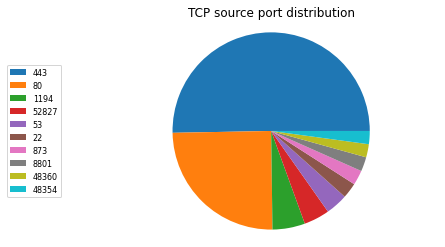

In [9]:
# data to plot
labels = []
sizes = []
for x in tcp_s_sorted_idx[:10]:
    labels.append(x)
    sizes.append(tcp_s[x])

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title("TCP source port distribution")
plt.show()

In [10]:
# data to plot
labels = []
sizes = []
for x in tcp_d_sorted_idx[:10]:
    labels.append(x)
    sizes.append(tcp_d[x])

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title("TCP dest port distribution")
plt.show()

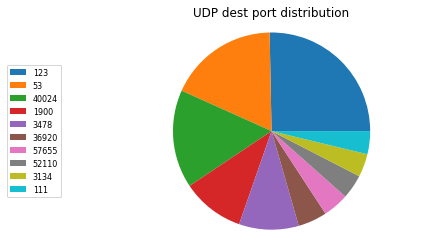

In [11]:
# data to plot
labels = []
sizes = []
for x in udp_d_idx[:10]:
    labels.append(x)
    sizes.append(udp_d[x])

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title("UDP dest port distribution")
plt.show()
